# Hands-On Data Preprocessing in Python
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib
### **Overview of Pandas**

# Hands-On Practice

In short, a DataFrame is a two-dimensional data structure with a good interface and great codability.

In [172]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


A DataFrame is a collection of series. Not only is each attribute a series, but each row is also a series. 

In [173]:
print(f"The type of a column is: {type(adult_df.age)}")

print(f"\nThe type of a row is: {type(adult_df.loc[0])}")

print(f"\nThe index of a row is:{adult_df.loc[0].index}")

print(f"\nThe index of a column is:{adult_df.age.index}")

The type of a column is: <class 'pandas.core.series.Series'>

The type of a row is: <class 'pandas.core.series.Series'>

The index of a row is:Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

The index of a column is:RangeIndex(start=0, stop=32561, step=1)


## Pandas DataFrame access

The only two keywords you will ever need to access the rows of a DataFrame are .loc[] and .iloc[]. To understand the difference between them, you need to know that each Pandas series or DataFrame carries two types of indices: default indices or assigned indices.

.set_index() function, by default, outputs a new DataFrame that has the requested index unless inplace=True is specified, which requests the change to be applied to the original DataFrame.

In [174]:
adult_df.set_index(np.arange(10000,42561), inplace=True)

In [175]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


You can use .iloc[] to access the data using the default integer indices. For instance, running adult_df.iloc[1] will also return the second row.

In [176]:
adult_df.iloc[1]

age                               50
workclass           Self-emp-not-inc
fnlwgt                         83311
education                  Bachelors
education-num                     13
marital-status    Married-civ-spouse
occupation           Exec-managerial
relationship                 Husband
race                           White
sex                             Male
capitalGain                        0
capitalLoss                        0
hoursPerWeek                      13
nativeCountry          United-States
income                         <=50K
Name: 10001, dtype: object

The easier and better way to access your columns is to know that each column is coded to be a property of a DataFrame. So, you can access each column by using .ColumnName.

In [177]:
print(adult_df.age)
print(adult_df["education-num"])

10000    39
10001    50
10002    38
10003    53
10004    28
         ..
42556    27
42557    40
42558    58
42559    22
42560    52
Name: age, Length: 32561, dtype: int64
10000    13
10001    13
10002     9
10003     7
10004    13
         ..
42556    12
42557     9
42558     9
42559     9
42560     9
Name: education-num, Length: 32561, dtype: int64


In [178]:
# Different ways of access to a value (column,row)
print(f"Locating the row, then the column : {adult_df.iloc[2].loc["education"]}")
print(f"\nLocating the column, then the row : {adult_df.education.loc[10002]}")
print(f"\nLocating the column by string/quotation then the row: {adult_df["education"].iloc[2]}")
print(f"\nUsing at[] attribute: {adult_df.at[10002,'education']}")

Locating the row, then the column : HS-grad

Locating the column, then the row : HS-grad

Locating the column by string/quotation then the row: HS-grad

Using at[] attribute: HS-grad


You can access the values of a series using all of the methods mentioned for DataFrames, except for .at[].

In [179]:
row_series = adult_df.loc[10002]

print(row_series.loc['education'])
print(row_series.iloc[3])
print(row_series['education'])
print(row_series.education)

HS-grad
HS-grad
HS-grad
HS-grad


Just like NumPy arrays, Pandas DataFrames can also be sliced both on the columns and rows. However, the slicing function can only be done inside either .loc[] or .iloc[]. The access method, .at[], and the other ways of accessing data do not support slicing.

In [180]:
adult_df.loc[:,'education':'occupation']

,education,education-num,marital-status,occupation
10000,Bachelors,13,Never-married,Adm-clerical
10001,Bachelors,13,Married-civ-spouse,Exec-managerial
10002,HS-grad,9,Divorced,Handlers-cleaners
10003,11th,7,Married-civ-spouse,Handlers-cleaners
10004,Bachelors,13,Married-civ-spouse,Prof-specialty
...,...,...,...,...
42556,Assoc-acdm,12,Married-civ-spouse,Tech-support
42557,HS-grad,9,Married-civ-spouse,Machine-op-inspct
42558,HS-grad,9,Widowed,Adm-clerical
42559,HS-grad,9,Never-married,Adm-clerical


## Boolean masking for filtering a DataFrame

When you want to filter a DataFrame using a Boolean mask, you need a one-dimensional collection of Boolean values (True or False) that has as many Boolean values as the number of rows of DataFrames you want to filter.

In [181]:
# Example filtering for Preschool education only within the DataFrame
print(f"Median : {adult_df[adult_df.education == 'Preschool'].age.mean()}")
print(f"Median : {adult_df[adult_df.education == 'Preschool'].age.median()}")

Median : 42.76470588235294
Median : 41.0


As an analytical example, if we want to analyze the capital gain of individuals with less than 10 years education wit the opposite group...

In [182]:
print(f">10 years of education - Capital Gain: ${adult_df[adult_df['education-num'] > 10].capitalGain.mean():.2f}")
print(f"<10 years of education - Capital Gain: ${adult_df[adult_df['education-num'] < 10].capitalGain.mean():.2f}")

>10 years of education - Capital Gain: $2230.94
<10 years of education - Capital Gain: $492.26


## Pandas functions for exploring a DataFrame

.shape is the attribute of any Pandas DataFrame. It tells you how many rows and columns the DataFrame has.

In [183]:
adult_df.shape

(32561, 15)

.columns allows you to see and edit the column names in your DataFrame. Furthermore, .columns can be used to update the columns' names.

In [184]:
adult_df.shape

adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship', 'race', 'sex',
                    'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
                    'income']

The info() method provides information about both the shape and the columns of the DataFrame. The functions that Pandas has to get to know the numerical columns are different than those of categorical columns.

In [185]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 10000 to 42560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalGain     32561 non-null  int64 
 11  capitalLoss     32561 non-null  int64 
 12  hoursPerWeek    32561 non-null  int64 
 13  nativeCountry   31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


The .describe() method outputs many useful statistical metrics that are meant to summarize data for each column. These metrics include Count, Mean, Standard Deviation (std), Minimum (min), first quartile (25%), second quartile (50%) or median, third quartile (75%), and Maximum (max). 

In [186]:
adult_df.describe()

,age,fnlwgt,education_num,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Histograms and boxplots to visualize numerical columns

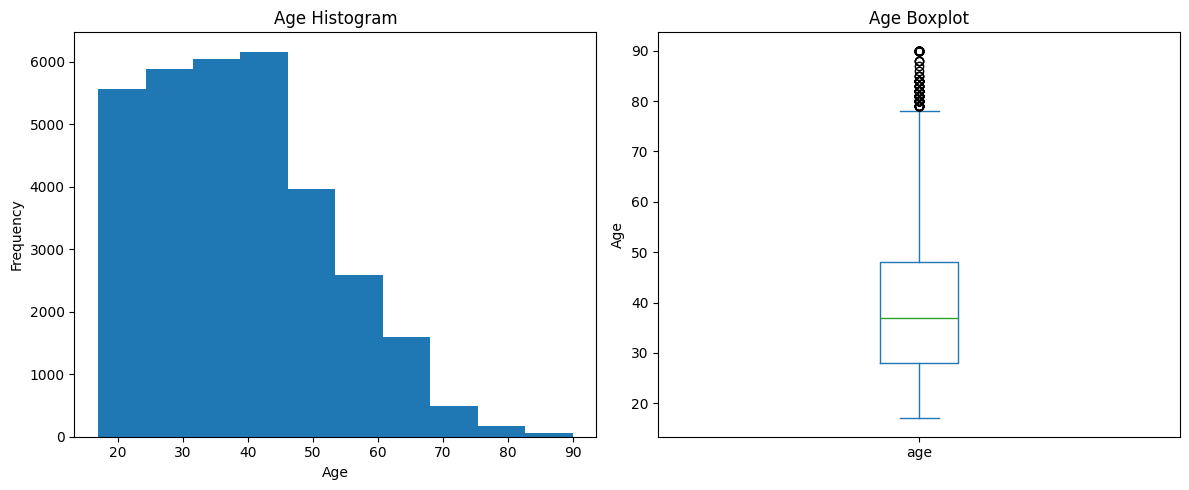

In [187]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
adult_df.age.plot.hist(ax=axes[0], title='Age Histogram')
axes[0].set_xlabel('Age')

# Boxplot
adult_df.age.plot.box(ax=axes[1], title='Age Boxplot')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

The .unique() function does just that. It simply returns all the possible values of the columns.

In [188]:
adult_df.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

The next step in getting to know a categorical column is realizing how often each possibility happens. The .value_counts() function does exactly that.

The output of the .value_counts() function is also known as the frequency table. There is also the relative frequency table, which shows the ratio of occurrences instead of the number of occurrences for each possibility. To get the relative frequency table, all you need to do is to specify that you want the table to be normalized: .value_counts(normalize=True).

In [189]:
adult_df.relationship.value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [190]:
adult_df.relationship.value_counts(normalize=True).map('{:.2%}'.format)

relationship
Husband           40.52%
Not-in-family     25.51%
Own-child         15.56%
Unmarried         10.58%
Wife               4.82%
Other-relative     3.01%
Name: proportion, dtype: object

<Axes: xlabel='relationship'>

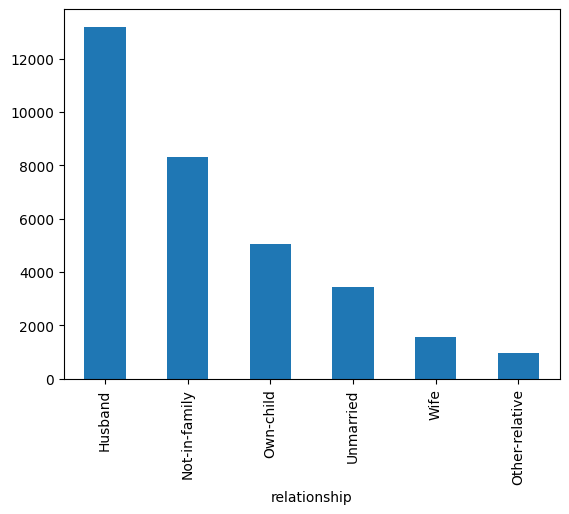

In [191]:
adult_df.relationship.value_counts().plot.bar()

## Pandas applying a function

There are a lot of instances where we will want to do the same calculations for each row in a dataset. You can apply a function to a series or a DataFrame. Since applying a function to a series is somewhat easier



In [192]:
def MultiplyBy2(n):
    return n*2

adult_df.age.apply(MultiplyBy2)

10000     78
10001    100
10002     76
10003    106
10004     56
        ... 
42556     54
42557     80
42558    116
42559     44
42560    104
Name: age, Length: 32561, dtype: int64

In [193]:
total_fnlwgt = adult_df.fnlwgt.sum()

def CalculatePercentage(v):

    return v/total_fnlwgt*100

adult_df.fnlwgt = adult_df.fnlwgt.apply(CalculatePercentage)

adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,0.001254,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,0.001348,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,0.003490,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,0.003798,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,0.005476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,27,Private,0.004164,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
42557,40,Private,0.002498,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
42558,58,Private,0.002458,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42559,22,Private,0.003261,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Applying a Lambda function

A lambda function is a function that is expressed in one line. So, a lot of the time, applying a lambda function may make coding easier and perhaps help our code become a bit more readable at times.

In [194]:
total_fnlwgt = adult_df.fnlwgt.sum()
adult_df.fnlwgt = adult_df.fnlwgt.apply(lambda v: v/total_fnlwgt*100)
adult_df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,0.001254,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,0.001348,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,0.003490,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,0.003798,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,0.005476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,27,Private,0.004164,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
42557,40,Private,0.002498,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
42558,58,Private,0.002458,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42559,22,Private,0.003261,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Applying a function to a dataframe

The major difference between applying a function to a DataFrame and a series is when you are defining the function. While, for a series, we had to assume that one value would be input in the function, for a DataFrame, we have to assume that a row series will be input. So, when you are defining a function to apply to a DataFrame, you can engage any column that you need.

In [195]:
# Input row was assumed to be a row series of adult_df
def CalcLifeNoEd(row):
    return row.age - row.education_num

# .apply() comes after the df instead of after any columns
adult_df.apply(CalcLifeNoEd, axis=1) # axis=1  means apply the function to every row, not every column (axis=0)

10000    26
10001    37
10002    29
10003    46
10004    15
         ..
42556    15
42557    31
42558    49
42559    13
42560    43
Length: 32561, dtype: int64

In [196]:
# This can also be done with a lambda function
adult_df.apply(lambda r: r.age-r.education_num, axis=1)

10000    26
10001    37
10002    29
10003    46
10004    15
         ..
42556    15
42557    31
42558    49
42559    13
42560    43
Length: 32561, dtype: int64

In [197]:
def CalcCapitalNet(row):
    return row.capitalGain - row.capitalLoss

adult_df["capitalNet"] = adult_df.apply(CalcCapitalNet, axis=1)

In [262]:
# Which one is more important in terms of your financial success: education or life experience?
# Create a column with years lived without education
adult_df["lifeNoEd"] = adult_df.apply(lambda r: r.age - r.education_num, axis=1)

# Create a column of Net worth
adult_df["capitalNet"] = adult_df.apply(lambda r: r.capitalGain - r.capitalLoss, axis=1)

# Evaluate correlations
adult_df[["education_num","lifeNoEd","capitalNet"]].corr()

,education_num,lifeNoEd,capitalNet
education_num,1.000000,-0.150452,0.117891
lifeNoEd,-0.150452,1.000000,0.051490
capitalNet,0.117891,0.051490,1.000000


## Pandas groupby function

This is one of the most useful analytics and preprocessing tools of Pandas. As the name Groupby suggests, it groups your data by something. Normally, you would want to group your data by categorical attributes.

In [272]:
# The only aggregate function that works without having to specify a column of interest is .size()
adult_df.groupby(['marital_status','sex']).size()

marital_status         sex   
Divorced               Female     2672
                       Male       1771
Married-AF-spouse      Female       14
                       Male          9
Married-civ-spouse     Female     1657
                       Male      13319
Married-spouse-absent  Female      205
                       Male        213
Never-married          Female     4767
                       Male       5916
Separated              Female      631
                       Male        394
Widowed                Female      825
                       Male        168
dtype: int64

In [274]:
adult_df.groupby(['marital_status','sex']).age.median()

marital_status         sex   
Divorced               Female    43.0
                       Male      42.0
Married-AF-spouse      Female    31.0
                       Male      29.0
Married-civ-spouse     Female    38.0
                       Male      43.0
Married-spouse-absent  Female    39.0
                       Male      41.0
Never-married          Female    25.0
                       Male      25.0
Separated              Female    39.0
                       Male      38.0
Widowed                Female    60.0
                       Male      62.5
Name: age, dtype: float64

In [290]:
# Were the race and gender of individuals in 1966 influential in their financial success?
adult_df.groupby(['race','sex']).capitalNet.mean().sort_index(level='race', ascending=False).apply(lambda x: f"${x:,.2f}")

race                sex   
White               Male      $1,266.41
                    Female      $508.22
Other               Male      $1,314.44
                    Female      $218.39
Black               Male        $627.27
                    Female      $471.14
Asian-Pac-Islander  Male      $1,707.44
                    Female      $727.58
Amer-Indian-Eskimo  Male        $628.86
                    Female      $530.14
Name: capitalNet, dtype: object

## The .unstack() function

This function pushes the outer level of the multi-level index to the columns. If the multi-level index only has two levels, after running .unstack(), it will become single-level. Likewise, if the .unstack() function is run for a series with a multi-level index, the output will be a DataFrame whose columns are the outer level index that was pushed.

In [291]:
grb_result = adult_df.groupby(['race','sex']).capitalNet.mean().unstack()
grb_result

sex,Female,Male
race,,
Amer-Indian-Eskimo,530.142857,628.864583
Asian-Pac-Islander,727.583815,1707.440115
Black,471.142765,627.268324
Other,218.385321,1314.438272
White,508.219857,1266.413112


If there are more than two levels, executing .unstack() more than once will, one by one, push the outer level of the index to the columns.

In [292]:
mlt_seris = adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     0.001764
                            >50K      0.002395
                    Male    <=50K     0.002046
                            >50K      0.001954
Asian-Pac-Islander  Female  <=50K     0.002398
                            >50K      0.002305
                    Male    <=50K     0.002652
                            >50K      0.002762
Black               Female  <=50K     0.003454
                            >50K      0.003331
                    Male    <=50K     0.003922
                            >50K      0.003971
Other               Female  <=50K     0.002803
                            >50K      0.002593
                    Male    <=50K     0.003478
                            >50K      0.003310
White               Female  <=50K     0.002969
                            >50K      0.002978
                    Male    <=50K     0.003074
                            >50K      0.003025
Name: fnlwgt, dtype: floa

In [302]:
mlt_seris.unstack()

income                        <=50K      >50K
race               sex                       
Amer-Indian-Eskimo Female  0.001764  0.002395
                   Male    0.002046  0.001954
Asian-Pac-Islander Female  0.002398  0.002305
                   Male    0.002652  0.002762
Black              Female  0.003454  0.003331
                   Male    0.003922  0.003971
Other              Female  0.002803  0.002593
                   Male    0.003478  0.003310
White              Female  0.002969  0.002978
                   Male    0.003074  0.003025

In [303]:
mlt_seris.unstack().unstack()

income                 <=50K                >50K          
sex                   Female      Male    Female      Male
race                                                      
Amer-Indian-Eskimo  0.001764  0.002046  0.002395  0.001954
Asian-Pac-Islander  0.002398  0.002652  0.002305  0.002762
Black               0.003454  0.003922  0.003331  0.003971
Other               0.002803  0.003478  0.002593  0.003310
White               0.002969  0.003074  0.002978  0.003025

## Pandas pivot and melt functions

In a nutshell, .pivot() and .melt() help you to switch between two forms of two-dimensional data structures: wide form and long form. The wide form uses many columns to introduce new dimensions in the dataset. The long form, however, uses a different logic of data structure and uses one index column to include all the relevant dimensions.

.melt() requires four inputs:

- id_vars: This input takes the identifying columns.
- value_vars: This input takes the columns that hold the values.
- var_name: This input takes the name you would like to give to the identifying column that will be added to the long format.
- value_name: This input takes the name you would like to give to the new value column that will be added to the long format.

In [305]:
wide_df = pd.read_csv('wide.csv')
wide_df

,ReadingDateTime,NO,NO2,NOX,PM10,PM2.5
0,01/01/2017 00:00,3.5,30.8,36.2,35.7,31.0
1,01/01/2017 01:00,3.6,31.5,37.0,28.5,31.0
2,01/01/2017 02:00,2.2,27.3,30.7,22.7,31.0


In [306]:
wide_df.melt(id_vars='ReadingDateTime'
            ,value_vars=['NO','NO2','NOX','PM10','PM2.5']
            ,var_name='Species'
            ,value_name='Value')

,ReadingDateTime,Species,Value
0,01/01/2017 00:00,NO,3.5
1,01/01/2017 01:00,NO,3.6
2,01/01/2017 02:00,NO,2.2
3,01/01/2017 00:00,NO2,30.8
4,01/01/2017 01:00,NO2,31.5
5,01/01/2017 02:00,NO2,27.3
6,01/01/2017 00:00,NOX,36.2
7,01/01/2017 01:00,NOX,37.0
8,01/01/2017 02:00,NOX,30.7
9,01/01/2017 00:00,PM10,35.7


In [ ]:
.pivot() needs three:

In [ ]:
long_df = pd.read_csv('long.csv')
long_df

,ReadingDateTime,Species,Value
0,01/01/2017 00:00,NO,3.5
1,01/01/2017 01:00,NO,3.6
2,01/01/2017 02:00,NO,2.2
3,01/01/2017 00:00,NO2,30.8
4,01/01/2017 01:00,NO2,31.5
5,01/01/2017 02:00,NO2,27.3
6,01/01/2017 00:00,NOX,36.2
7,01/01/2017 01:00,NOX,37.0
8,01/01/2017 02:00,NOX,30.7
9,01/01/2017 00:00,PM10,35.7


In [308]:
long_df.pivot(index='ReadingDateTime'
            ,columns='Species'
            ,values='Value')

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,31.0
01/01/2017 01:00,3.6,31.5,37.0,28.5,31.0
01/01/2017 02:00,2.2,27.3,30.7,22.7,31.0


# Adult Dataset Provided Code

"Census Income" dataset.

Number of Instances: 48842
Number of Attributes: 14
Date Donated: 1996-05-01
Missing Values?: Yes

### Attributes:

Number of Attributes: 6 continuous, 8 nominal attributes

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K



In [199]:
import pandas as pd
adult_df = pd.read_csv('adult.csv')

In [200]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [201]:
type(adult_df.age) 

pandas.core.series.Series

In [202]:
type(adult_df)

pandas.core.frame.DataFrame

In [203]:
adult_df.loc[0].index

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

In [204]:
adult_df.age.index

RangeIndex(start=0, stop=32561, step=1)

In [205]:
import numpy as np
adult_df.set_index(np.arange(10000,42561),inplace=True)

In [206]:
adult_df.set_index(np.arange(10000,42561))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
42557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
42558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [207]:
adult_df['education-num']

10000    13
10001    13
10002     9
10003     7
10004    13
         ..
42556    12
42557     9
42558     9
42559     9
42560     9
Name: education-num, Length: 32561, dtype: int64

In [208]:
adult_df.iloc[2].loc['education']

'HS-grad'

In [209]:
adult_df.education.loc[10002]

'HS-grad'

In [210]:
adult_df['education'].iloc[2]

'HS-grad'

In [211]:
adult_df.at[10002,'education']

'HS-grad'

In [212]:
row_series = adult_df.loc[10002]
print(row_series.loc['education'])
print(row_series.iloc[3])
print(row_series['education'])
print(row_series.education)

HS-grad
HS-grad
HS-grad
HS-grad


In [213]:
columns_series = adult_df.education
print(columns_series.loc[10002])
print(columns_series.iloc[2])
print(columns_series[10002])
# print(row_series.10002)  This will give syntax error!

HS-grad
HS-grad
HS-grad


# Slicing

In [214]:
my_array = np.array([[2,3,5,7],[11,13,17,19],
                     [23,29,31,37,], [41,43,47,49]])
my_array

array([[ 2,  3,  5,  7],
       [11, 13, 17, 19],
       [23, 29, 31, 37],
       [41, 43, 47, 49]])

In [215]:
my_array[1,1]

np.int64(13)

In [216]:
my_array[1,:]

array([11, 13, 17, 19])

In [217]:
my_array[:,1]

array([ 3, 13, 29, 43])

In [218]:
my_array

array([[ 2,  3,  5,  7],
       [11, 13, 17, 19],
       [23, 29, 31, 37],
       [41, 43, 47, 49]])

In [219]:
my_array[1:3,:]

array([[11, 13, 17, 19],
       [23, 29, 31, 37]])

In [220]:
my_array[1:3,0:2]

array([[11, 13],
       [23, 29]])

In [221]:
my_array[1:3,[0,2]]

array([[11, 17],
       [23, 31]])

In [222]:
adult_df.loc[:,'education':'occupation']

,education,education-num,marital-status,occupation
10000,Bachelors,13,Never-married,Adm-clerical
10001,Bachelors,13,Married-civ-spouse,Exec-managerial
10002,HS-grad,9,Divorced,Handlers-cleaners
10003,11th,7,Married-civ-spouse,Handlers-cleaners
10004,Bachelors,13,Married-civ-spouse,Prof-specialty
...,...,...,...,...
42556,Assoc-acdm,12,Married-civ-spouse,Tech-support
42557,HS-grad,9,Married-civ-spouse,Machine-op-inspct
42558,HS-grad,9,Widowed,Adm-clerical
42559,HS-grad,9,Never-married,Adm-clerical


In [223]:
adult_df.sort_values('education-num').reset_index().iloc[1:32561:3617]

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
1,42432,36,Private,208068,Preschool,1,Divorced,Other-service,Not-in-family,Other,Male,0,0,72,Mexico,<=50K
3618,13705,43,Private,76487,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7235,17294,53,Private,141388,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
10852,11766,24,Private,228424,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
14469,25218,30,Private,144064,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,62,United-States,<=50K
18086,28059,22,Private,174461,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<=50K
21703,20308,25,Private,113436,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,15,United-States,<=50K
25320,25231,30,State-gov,193380,Bachelors,13,Never-married,Prof-specialty,Other-relative,White,Male,0,0,35,United-States,<=50K
28937,40173,24,Private,330571,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,<=50K
32554,32280,59,State-gov,192258,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


# Boolean Masking

In [224]:
twopowers_sr = pd.Series([1,2,4,8,16,32,64,128,256,512,1024])
BM = [False,False,False,True,False,False,False,True,True,True,True]
twopowers_sr[BM]

3        8
7      128
8      256
9      512
10    1024
dtype: int64

In [225]:
twopowers_sr >=500

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
dtype: bool

In [226]:
BM = twopowers_sr >=500
twopowers_sr[BM]

9      512
10    1024
dtype: int64

In [227]:
twopowers_sr[twopowers_sr >=500]

9      512
10    1024
dtype: int64

In [228]:
BM = adult_df.education == 'Preschool'
print('Mean: {}'.format(np.mean(adult_df[BM].age)))
print('Median: {}'.format(np.median(adult_df[BM].age)))

Mean: 42.76470588235294
Median: 41.0


In [229]:
BM1 = adult_df['education-num'] > 10
BM2 = adult_df['education-num'] < 10

print('More than 10 years of education - Capital Gain: {}'
      .format(np.mean(adult_df[BM1].capitalGain)))
print('Less than 10 years of education - Capital Gain: {}'
      .format(np.mean(adult_df[BM2].capitalGain)))

More than 10 years of education - Capital Gain: 2230.9397109166985
Less than 10 years of education - Capital Gain: 492.25532059102613


# Get to know a dataset

In [230]:
adult_df.shape

(32561, 15)

In [231]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'income'],
      dtype='object')

In [232]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                    'education_num', 'marital_status', 'occupation',
                    'relationship', 'race', 'sex', 'capitalGain',
                    'capitalLoss', 'hoursPerWeek', 'nativeCountry',
                    'income']

In [233]:
adult_df.describe()

,age,fnlwgt,education_num,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: ylabel='Frequency'>

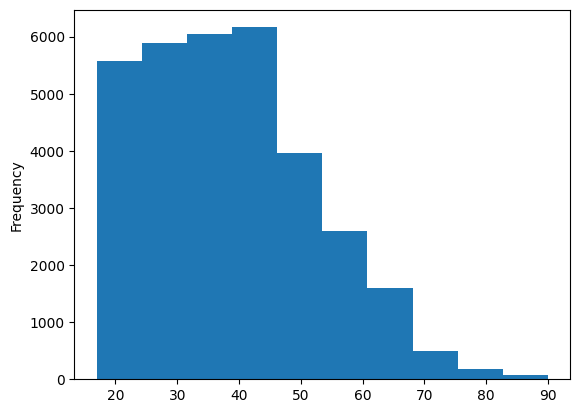

In [234]:
adult_df.age.plot.hist()

In [235]:
adult_df.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [236]:
adult_df.relationship.value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

<Axes: xlabel='relationship'>

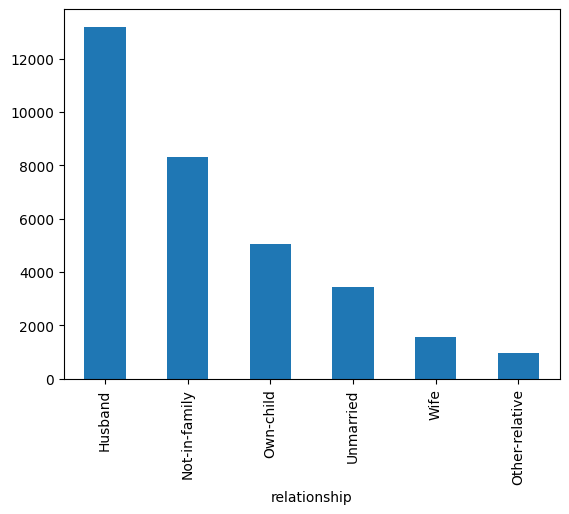

In [237]:
adult_df.relationship.value_counts().plot.bar()

# Appy a function

In [238]:
def MultiplyBy2(n):
    return n*2

adult_df.age.apply(MultiplyBy2)

10000     78
10001    100
10002     76
10003    106
10004     56
        ... 
42556     54
42557     80
42558    116
42559     44
42560    104
Name: age, Length: 32561, dtype: int64

### Applying a Function - Analytic Example 1
Divide every value in column fnlwgt by the sum of all its values.

In [239]:
total_fnlwgt = adult_df.fnlwgt.sum()

def CalculatePercentage(v):
    return v/total_fnlwgt*100

adult_df.fnlwgt = adult_df.fnlwgt.apply(CalculatePercentage)
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,0.001254,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,0.001348,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,0.003490,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,0.003798,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,0.005476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,27,Private,0.004164,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
42557,40,Private,0.002498,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
42558,58,Private,0.002458,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42559,22,Private,0.003261,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [240]:
total_fnlwgt = adult_df.fnlwgt.sum()

adult_df.fnlwgt = adult_df.fnlwgt.apply(lambda v: v/total_fnlwgt*100)
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,0.001254,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
10001,50,Self-emp-not-inc,0.001348,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
10002,38,Private,0.003490,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10003,53,Private,0.003798,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
10004,28,Private,0.005476,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,27,Private,0.004164,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
42557,40,Private,0.002498,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
42558,58,Private,0.002458,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
42559,22,Private,0.003261,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [241]:
def CalcLifeNoEd(row):
    return row.age - row.education_num

adult_df.apply(CalcLifeNoEd,axis=1)

10000    26
10001    37
10002    29
10003    46
10004    15
         ..
42556    15
42557    31
42558    49
42559    13
42560    43
Length: 32561, dtype: int64

In [242]:
adult_df.apply(lambda r: r.age-r.education_num,axis=1)

10000    26
10001    37
10002    29
10003    46
10004    15
         ..
42556    15
42557    31
42558    49
42559    13
42560    43
Length: 32561, dtype: int64

In [243]:
adult_df['lifeNoEd'] = adult_df.apply(
    lambda r: r.age-r.education_num,axis=1)

adult_df['capitalNet'] = adult_df.apply(
    lambda r: r.capitalGain - r.capitalLoss,axis=1)

adult_df[['education_num','lifeNoEd','capitalNet']].corr()

,education_num,lifeNoEd,capitalNet
education_num,1.000000,-0.150452,0.117891
lifeNoEd,-0.150452,1.000000,0.051490
capitalNet,0.117891,0.051490,1.000000


# Groupby

In [244]:
adult_df.groupby(['marital_status','sex']).age.median()

marital_status         sex   
Divorced               Female    43.0
                       Male      42.0
Married-AF-spouse      Female    31.0
                       Male      29.0
Married-civ-spouse     Female    38.0
                       Male      43.0
Married-spouse-absent  Female    39.0
                       Male      41.0
Never-married          Female    25.0
                       Male      25.0
Separated              Female    39.0
                       Male      38.0
Widowed                Female    60.0
                       Male      62.5
Name: age, dtype: float64

In [245]:
adult_df.groupby(['race','sex']).capitalNet.mean()

race                sex   
Amer-Indian-Eskimo  Female     530.142857
                    Male       628.864583
Asian-Pac-Islander  Female     727.583815
                    Male      1707.440115
Black               Female     471.142765
                    Male       627.268324
Other               Female     218.385321
                    Male      1314.438272
White               Female     508.219857
                    Male      1266.413112
Name: capitalNet, dtype: float64

In [246]:
grb_result =adult_df.groupby(['race','sex']).capitalNet.mean()

print(grb_result.index)

MultiIndex([('Amer-Indian-Eskimo', 'Female'),
            ('Amer-Indian-Eskimo',   'Male'),
            ('Asian-Pac-Islander', 'Female'),
            ('Asian-Pac-Islander',   'Male'),
            (             'Black', 'Female'),
            (             'Black',   'Male'),
            (             'Other', 'Female'),
            (             'Other',   'Male'),
            (             'White', 'Female'),
            (             'White',   'Male')],
           names=['race', 'sex'])


In [247]:
grb_result =adult_df.groupby(['race','sex']).capitalNet.mean()
grb_result

race                sex   
Amer-Indian-Eskimo  Female     530.142857
                    Male       628.864583
Asian-Pac-Islander  Female     727.583815
                    Male      1707.440115
Black               Female     471.142765
                    Male       627.268324
Other               Female     218.385321
                    Male      1314.438272
White               Female     508.219857
                    Male      1266.413112
Name: capitalNet, dtype: float64

In [248]:
grb_result.unstack()

sex,Female,Male
race,,
Amer-Indian-Eskimo,530.142857,628.864583
Asian-Pac-Islander,727.583815,1707.440115
Black,471.142765,627.268324
Other,218.385321,1314.438272
White,508.219857,1266.413112


In [249]:
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     0.001764
                            >50K      0.002395
                    Male    <=50K     0.002046
                            >50K      0.001954
Asian-Pac-Islander  Female  <=50K     0.002398
                            >50K      0.002305
                    Male    <=50K     0.002652
                            >50K      0.002762
Black               Female  <=50K     0.003454
                            >50K      0.003331
                    Male    <=50K     0.003922
                            >50K      0.003971
Other               Female  <=50K     0.002803
                            >50K      0.002593
                    Male    <=50K     0.003478
                            >50K      0.003310
White               Female  <=50K     0.002969
                            >50K      0.002978
                    Male    <=50K     0.003074
                            >50K      0.003025
Name: fnlwgt, dtype: floa

In [250]:
mlt_seris.unstack()

income                        <=50K      >50K
race               sex                       
Amer-Indian-Eskimo Female  0.001764  0.002395
                   Male    0.002046  0.001954
Asian-Pac-Islander Female  0.002398  0.002305
                   Male    0.002652  0.002762
Black              Female  0.003454  0.003331
                   Male    0.003922  0.003971
Other              Female  0.002803  0.002593
                   Male    0.003478  0.003310
White              Female  0.002969  0.002978
                   Male    0.003074  0.003025

In [251]:
mlt_seris.unstack().unstack()

income                 <=50K                >50K          
sex                   Female      Male    Female      Male
race                                                      
Amer-Indian-Eskimo  0.001764  0.002046  0.002395  0.001954
Asian-Pac-Islander  0.002398  0.002652  0.002305  0.002762
Black               0.003454  0.003922  0.003331  0.003971
Other               0.002803  0.003478  0.002593  0.003310
White               0.002969  0.003074  0.002978  0.003025

In [252]:
mlt_df= mlt_seris.unstack().unstack()
mlt_df.columns

MultiIndex([('<=50K', 'Female'),
            ('<=50K',   'Male'),
            ( '>50K', 'Female'),
            ( '>50K',   'Male')],
           names=['income', 'sex'])

In [253]:
mlt_df.stack()

C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_19692\2163858474.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  mlt_df.stack()


income                        <=50K      >50K
race               sex                       
Amer-Indian-Eskimo Female  0.001764  0.002395
                   Male    0.002046  0.001954
Asian-Pac-Islander Female  0.002398  0.002305
                   Male    0.002652  0.002762
Black              Female  0.003454  0.003331
                   Male    0.003922  0.003971
Other              Female  0.002803  0.002593
                   Male    0.003478  0.003310
White              Female  0.002969  0.002978
                   Male    0.003074  0.003025

In [254]:
mlt_df.stack().stack()

C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_19692\2517862891.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  mlt_df.stack().stack()


race                sex     income
Amer-Indian-Eskimo  Female  <=50K     0.001764
                            >50K      0.002395
                    Male    <=50K     0.002046
                            >50K      0.001954
Asian-Pac-Islander  Female  <=50K     0.002398
                            >50K      0.002305
                    Male    <=50K     0.002652
                            >50K      0.002762
Black               Female  <=50K     0.003454
                            >50K      0.003331
                    Male    <=50K     0.003922
                            >50K      0.003971
Other               Female  <=50K     0.002803
                            >50K      0.002593
                    Male    <=50K     0.003478
                            >50K      0.003310
White               Female  <=50K     0.002969
                            >50K      0.002978
                    Male    <=50K     0.003074
                            >50K      0.003025
dtype: float64

# Pivot & Melt

In [255]:
wide_df = pd.read_csv('wide.csv')
wide_df

,ReadingDateTime,NO,NO2,NOX,PM10,PM2.5
0,01/01/2017 00:00,3.5,30.8,36.2,35.7,31.0
1,01/01/2017 01:00,3.6,31.5,37.0,28.5,31.0
2,01/01/2017 02:00,2.2,27.3,30.7,22.7,31.0


In [256]:
wide_df.melt(id_vars='ReadingDateTime',
             value_vars=['NO','NO2','NOX','PM10','PM2.5'],
             var_name='Species',
             value_name='Value')

,ReadingDateTime,Species,Value
0,01/01/2017 00:00,NO,3.5
1,01/01/2017 01:00,NO,3.6
2,01/01/2017 02:00,NO,2.2
3,01/01/2017 00:00,NO2,30.8
4,01/01/2017 01:00,NO2,31.5
5,01/01/2017 02:00,NO2,27.3
6,01/01/2017 00:00,NOX,36.2
7,01/01/2017 01:00,NOX,37.0
8,01/01/2017 02:00,NOX,30.7
9,01/01/2017 00:00,PM10,35.7


In [257]:
long_df = pd.read_csv('long.csv')
long_df

,ReadingDateTime,Species,Value
0,01/01/2017 00:00,NO,3.5
1,01/01/2017 01:00,NO,3.6
2,01/01/2017 02:00,NO,2.2
3,01/01/2017 00:00,NO2,30.8
4,01/01/2017 01:00,NO2,31.5
5,01/01/2017 02:00,NO2,27.3
6,01/01/2017 00:00,NOX,36.2
7,01/01/2017 01:00,NOX,37.0
8,01/01/2017 02:00,NOX,30.7
9,01/01/2017 00:00,PM10,35.7


In [258]:
long_df.pivot(index='ReadingDateTime',
              columns='Species',
              values='Value')

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,31.0
01/01/2017 01:00,3.6,31.5,37.0,28.5,31.0
01/01/2017 02:00,2.2,27.3,30.7,22.7,31.0
